# 超密度符号

## 演習3 の解答例
超密度符号の回路（下の図）を自分で組んで、実行してみましょう。<br>
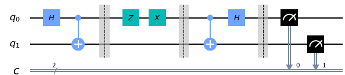

In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': None,
 'qiskit': '0.19.1'}

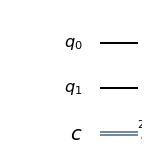

In [3]:
# 2量子ビット回路を用意してください
qc=QuantumCircuit(2,2)

# 回路を描画します
qc.draw(output="mpl")

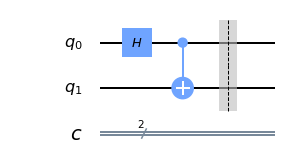

In [4]:
# EveがEPRペアを作ってAliceとBobに渡します
qc.h(0)
qc.cx(0,1)
qc.barrier()

# 回路を描画します
qc.draw(output="mpl")

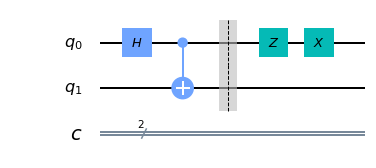

In [5]:
# Aliceが送りたい２古典ビットをセットします
msg = "11"    # 送りたいメッセージの入力

if msg == "00":
    pass
elif msg == "10":    #10の場合
    qc.x(0)
elif msg == "01":    #01の場合
    qc.z(0)
elif msg == "11":    #01の場合
    qc.z(0)
    qc.x(0)

# 回路を描画します
qc.draw(output="mpl")

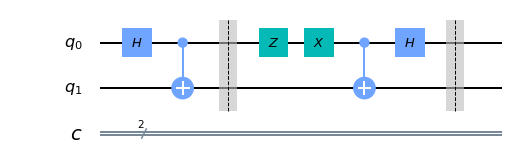

In [6]:
# BobはAliceからEPRビットをもらい、復元のためのゲートを適用します
qc.cx(0,1)
qc.h(0)
qc.barrier()

# 回路を描画します
qc.draw(output="mpl")

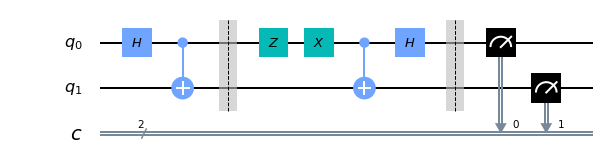

In [7]:
# Bobが測定します
qc.measure(0,0)
qc.measure(1,1)

# 回路を描画します
qc.draw(output="mpl")

{'11': 1024}


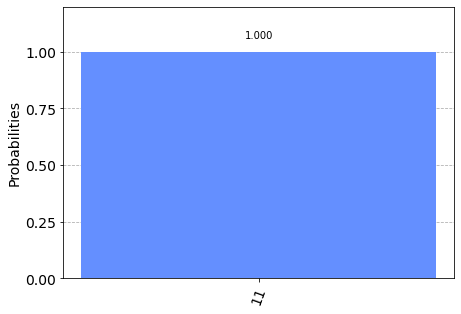

In [8]:
# qasm_simulator で実行して、AliceからBobに２ビットが転送されたか確認します。
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc,backend)
sim_result = job_sim.result()
print(sim_result.get_counts(qc))

from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(qc))

送りたいメッセージが復元できていますか？<br>
別のmsgでも確認してみましょう。